# Preliminaries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Set working directory
from google.colab import drive, runtime
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Install relevant packages
%pip install segment-geospatial groundingdino-py localtileserver
from samgeo import tms_to_geotiff
from samgeo.text_sam import LangSAM

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 33.2 MB/s eta

In [5]:
%cd drive/MyDrive/MLHC/satellite_semantic_segmentation/src

/content/drive/MyDrive/MLHC/satellite_semantic_segmentation/src


In [19]:
from ensemble_model import train_ensemble_model
from individual_model import train_individual_model
from tile_model import train_tile_model

In [7]:
sam = LangSAM()

GroundingDINO_SwinB.cfg.py:   0%|          | 0.00/1.01k [00:00<?, ?B/s]

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swinb_cogcoor.pth:   0%|          | 0.00/938M [00:00<?, ?B/s]

Downloading: "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth" to /root/.cache/torch/hub/checkpoints/sam_vit_h_4b8939.pth
100%|██████████| 2.39G/2.39G [00:07<00:00, 333MB/s]


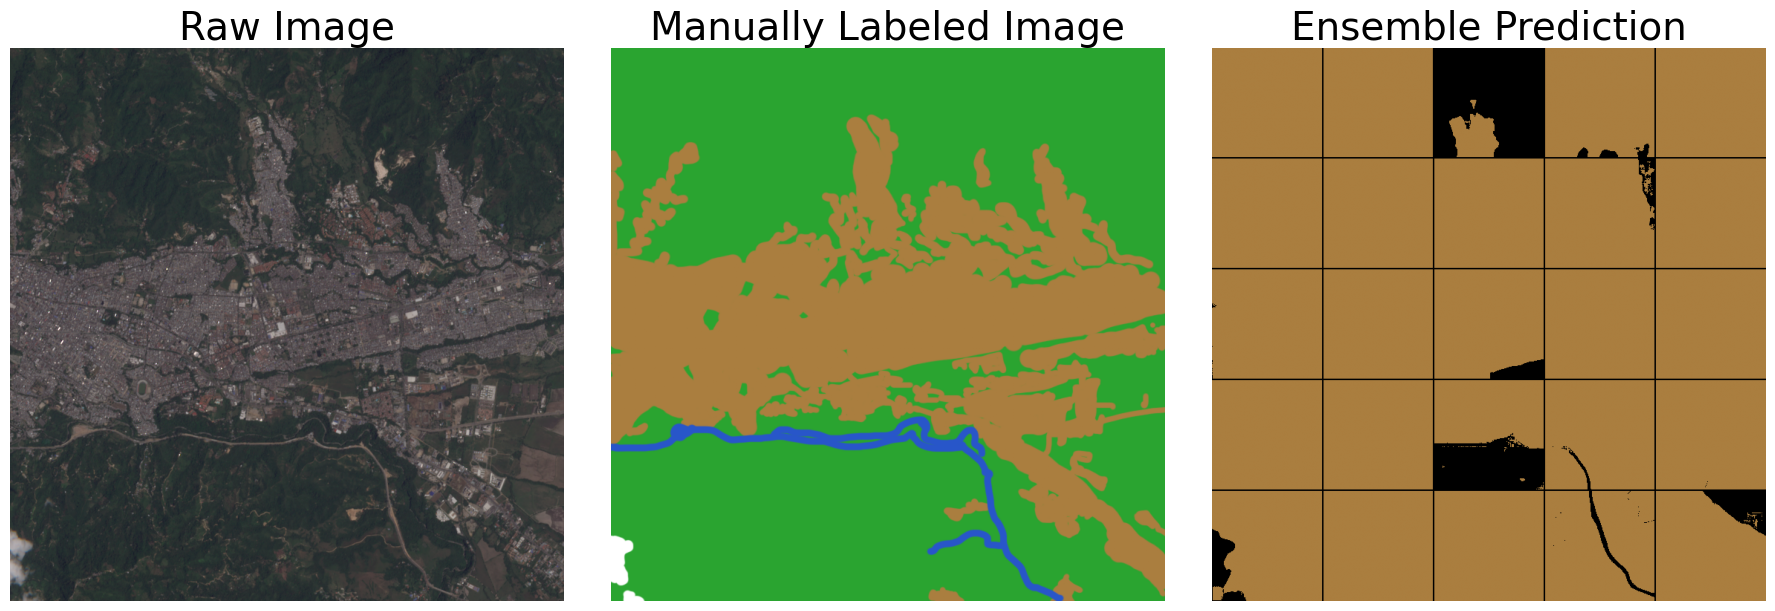

In [24]:
train_tile_model(
    sam = sam,
    image = "image_73001_2018-03-04",
    prompt = "building", bt = 0.05, tt = 0.3, object_being_predicted = "Urban",
    save_images = True, save_results = True
)

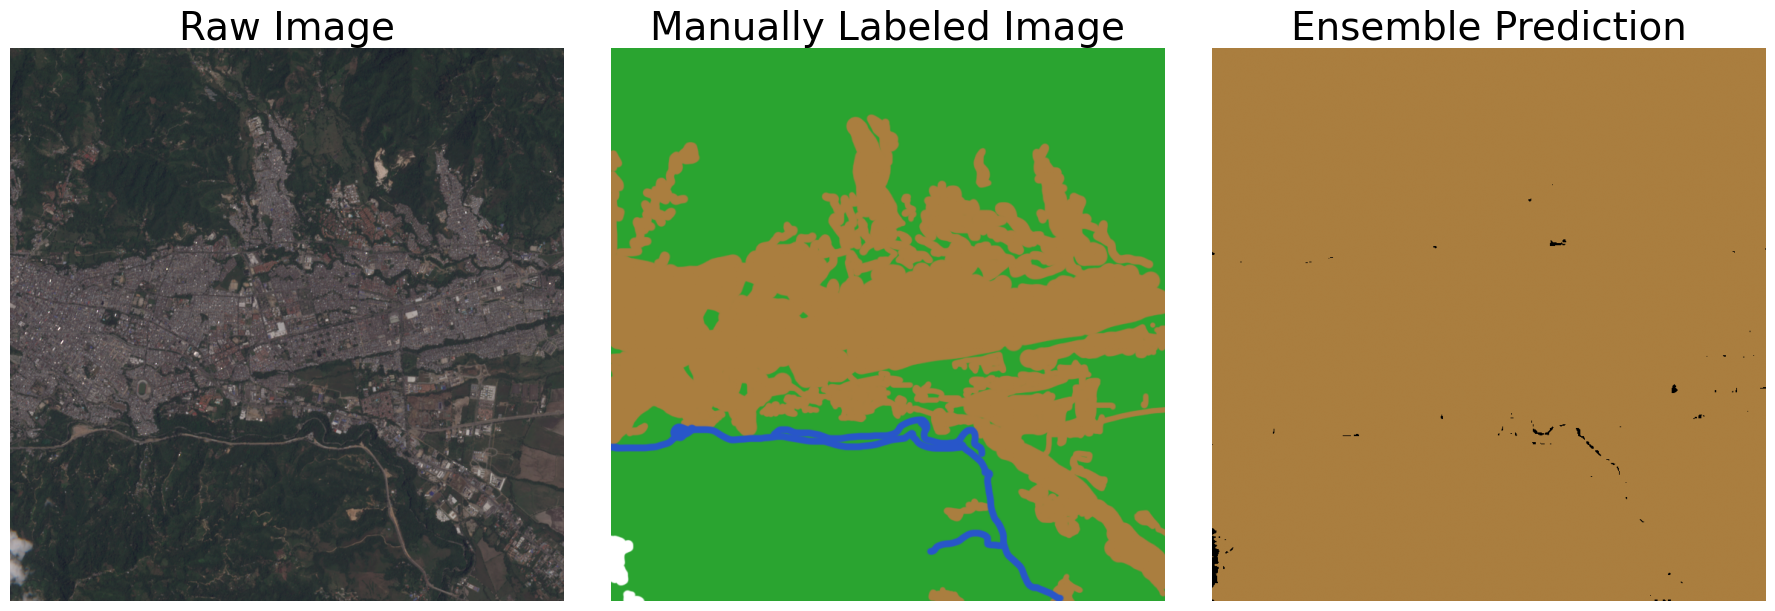

In [18]:
train_individual_model(
    sam = sam,
    image = "image_73001_2018-03-04", folder = "gamma",
    prompt = "building", bt = 0.2, tt = 0.4, object_being_predicted = "Urban",
    save_images = True, save_results = True
)

In [ ]:
# train_ensemble_model(
#     sam = sam,
#     image = "image_73001_2018-03-04",
#     urban_prompt = "building", cloud_prompt = "cloud", tree_prompt = "vegetation", water_prompt = "", bt = 0.2, tt = 0.4,
#     save_images = True, save_results = False
# )